# Análisis Exploratorio de Datos (EDA) - Tarea 30 de Enero

## Objetivo
Realizar un Exploratory Data Analysis (EDA) completo sobre una base de datos seleccionada, incluyendo:
- Análisis cuantitativo
- Análisis cualitativo
- Análisis gráfico
- Explicaciones de negocio

---

## Estudiantes
- Nombre: Manuela Caro Villada
- Nombre: Jeronimo Velasquez Escobar

## Fuentes de Datos Consultadas
1. **Base de datos 1**: [[Social Media In Students](https://www.kaggle.com/datasets/aminasalamt/social-media-dataset-2025)]
2. **Base de datos 2**: [[Food Order](https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis)]
3. **Base de datos 3**: [[Perfiles de Compradores](https://www.kaggle.com/datasets/dhrubangtalukdar/e-commerce-shopper-behavior-amazonshopify-based)]

---
## Base de datos seleccionada

### **Food Oder Data Set**

La razon por la cual se eligio esta base de datos con respecto a las demas es debido a que las otras bases de datos no cumplian todos los requisitos que se necesitaban para la entrega. Pero existe el caso especial proveniente del data set de "Perfiles de Compradores", a diferencia de los demas data sets este cumplia todas las expectativas que buscabamos, pero al revisar mas profundamente nos dimos cuenta que este tenia datos sinteticos, los cuales no nos dan una vision real de lo que vamos a encontrar normalmente.



---
## Descripciones de las variables
- order_id: ID único del pedido
- customer_id: ID del cliente que realizó el pedido
- restaurant_name: Nombre del restaurante
- cuisine_type: Tipo de cocina ordenada por el cliente
- cost: Costo del pedido
- day_of_the_week: Indica si el pedido se realizó en un día entre semana o fin de semana (Entre semana es de lunes a viernes y fin de semana es sábado y domingo)
- rating: Calificación dada por el cliente de 5
- food_preparation_time: Tiempo (en minutos) que tarda el restaurante en preparar la comida. Se calcula tomando la diferencia entre las marcas de tiempo de la confirmación del pedido del restaurante y la confirmación de recogida de la persona de entrega
- delivery_time: Tiempo (en minutos) que tarda la persona de entrega en entregar el paquete de comida. Se calcula tomando la diferencia entre las marcas de tiempo de la confirmación de recogida de la persona de entrega y la información de entrega

## 1. Importación de Librerías

In [ ]:
# Librerías para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## 2. Carga de Datos

In [ ]:
# Cargar la base de datos seleccionada
df = pd.read_csv('food_order.csv')

print(f"Dimensiones del dataset: {df.shape}")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Dimensiones del dataset: (1898, 9)
Filas: 1898, Columnas: 9


## 3. Exploración Inicial del Dataset

In [14]:
# Primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())
print("\n" + "="*80 + "\n")



Primeras 5 filas del dataset:
shape: (5, 9)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ order_id ┆ customer_ ┆ restauran ┆ cuisine_t ┆ … ┆ day_of_th ┆ rating    ┆ food_prep ┆ delivery_ │
│ ---      ┆ id        ┆ t_name    ┆ ype       ┆   ┆ e_week    ┆ ---       ┆ aration_t ┆ time      │
│ i64      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ str       ┆ ime       ┆ ---       │
│          ┆ i64       ┆ str       ┆ str       ┆   ┆ str       ┆           ┆ ---       ┆ i64       │
│          ┆           ┆           ┆           ┆   ┆           ┆           ┆ i64       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1477147  ┆ 337525    ┆ Hangawi   ┆ Korean    ┆ … ┆ Weekend   ┆ Not given ┆ 25        ┆ 20        │
│ 1477685  ┆ 358141    ┆ Blue      ┆ Japanese  ┆ … ┆ Weekend   ┆ Not given ┆ 25        ┆ 23        │
│          ┆           ┆ Ribbon    ┆           

In [15]:
# Información del dataset
print("Información del dataset:")
print(df.info())
print("\n" + "="*80 + "\n")

Información del dataset:


AttributeError: 'DataFrame' object has no attribute 'info'

In [ ]:
# Tipos de datos
print("Tipos de datos:")
print(df.dtypes)

Tipos de datos:
order_id                   int64
customer_id                int64
restaurant_name              str
cuisine_type                 str
cost_of_the_order        float64
day_of_the_week              str
rating                       str
food_preparation_time      int64
delivery_time              int64
dtype: object


## 4. Análisis Cuantitativo

In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
# Basado en las descripciones de las variables proporcionadas, seleccionamos las siguientes columnas numéricas
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
df_numerical = df[numerical_columns]
df_numerical['T_total'] = df_numerical['food_preparation_time'] + df_numerical['delivery_time']
df_numerical['rating'] = pd.to_numeric(df_numerical['rating'], errors='coerce')
print(df_numerical.describe())
print("\n" + "="*80 + "\n")


Estadísticas descriptivas:
       cost_of_the_order  food_preparation_time  delivery_time       rating  \
count        1898.000000            1898.000000    1898.000000  1162.000000   
mean           16.498851              27.371970      24.161749     4.344234   
std             7.483812               4.632481       4.972637     0.741478   
min             4.470000              20.000000      15.000000     3.000000   
25%            12.080000              23.000000      20.000000     4.000000   
50%            14.140000              27.000000      25.000000     5.000000   
75%            22.297500              31.000000      28.000000     5.000000   
max            35.410000              35.000000      33.000000     5.000000   

           T_total  
count  1898.000000  
mean     51.533720  
std       6.833603  
min      35.000000  
25%      47.000000  
50%      52.000000  
75%      56.000000  
max      68.000000  




In [ ]:
# Valores faltantes
print("Valores faltantes por columna:")
print(df_numerical.isnull().sum())
print(f"\nPorcentaje de valores faltantes:\n{(df_numerical.isnull().sum() / len(df_numerical) * 100).round(2)}%")
print("\n" + "="*80 + "\n")

Valores faltantes por columna:
cost_of_the_order          0
food_preparation_time      0
delivery_time              0
rating                   736
T_total                    0
dtype: int64

Porcentaje de valores faltantes:
cost_of_the_order         0.00
food_preparation_time     0.00
delivery_time             0.00
rating                   38.78
T_total                   0.00
dtype: float64%




In [ ]:
# Distribución de variables numéricas
print("Correlación entre variables numéricas:")
print(df_numerical.corr(numeric_only=True))

Correlación entre variables numéricas:
                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.033983              -0.006083   
T_total                         0.006358               0.685970   

                       delivery_time    rating   T_total  
cost_of_the_order          -0.029949  0.033983  0.006358  
food_preparation_time       0.011094 -0.006083  0.685970  
delivery_time               1.000000 -0.009804  0.735195  
rating                     -0.009804  1.000000 -0.011348  
T_total                     0.735195 -0.011348  1.000000  


In [ ]:
df_na = df_numerical[df_numerical['rating'].isna()]
df_na[['cost_of_the_order','T_total']].corr(method='pearson')
#df_numerical[['delivery_time', 'food_preparation_time', 'rating', 'cost_of_the_order']].corr(method='pearson')

,cost_of_the_order,T_total
cost_of_the_order,1.000000,0.065481
T_total,0.065481,1.000000


### Resultados encontrados del analisis de variables cuantitativas

- Se encontró que el promedio del valor total de las compras realizadas son de 16.4 USD con una desviacion estandar (std) de 7.4, lo que nos da como resultado que la mayoria de las compras realizadas se encuentran dentro de 9 USD y 23.8 USD.

- Se encontro que el promedio de las calificaciones dejadas por los usuarios es de 4.344234, mas de el 50% de las calificaciones dejadas son de 5 puntos y la menor de esta son 3. Pero hay que tener en cuenta que un 40% de los datos ingresados no cuentan con una calificacion establecida. Para el analisis anterior no se tomaron en cuenta estos valores nulos.

- El tiempo de entrega promedio de cada pedido es de 51 minutos, esto se calculó teniendo en cuenta la suma de los tiempos que nos brinda el data set. Ademas de esta conclusion observamos que el std de el tiempo de entrega es de 6.8, lo que nos dice que la mayoria de las entregas tardan entre 
57.8 minutos y 44.2 minutos.

- El promedio de preparacion de un pedido promedio basandonos en los datos es de 27.3 minutos, con un std de 4.6, lo que nos dice que la mayoria de alimentos se preparan en un rango de 22.7 minutos y 33.3 minutos

- El promedio de tiempo en el que se reparten los pedidos luego de ser preeparados es de 24.1 minutos con un std 4.9 minutos lo que nos dice que la mayoria de las entregas estan en un rango de entre que se prepararon entre 29 minutos y 19.2 minutos.


## 5. Análisis Cualitativo

In [ ]:
# Análisis de variables categóricas
print("Análisis de variables categóricas:\n")
not_numerical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week']
df_categorical = df[not_numerical_columns]
for col in df_categorical.columns:
    print(f"\n{col} (únicos: {df_categorical[col].nunique()}):")
    print(df_categorical[col].value_counts().head(10))
    print("-" * 50)

Análisis de variables categóricas:


restaurant_name (únicos: 178):
restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64
--------------------------------------------------

cuisine_type (únicos: 14):
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: count, dtype: int64
--------------------------------------------------

day_of_the_week (únicos: 2):
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
---------------------------

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del dataframe para el encoding
df_encoded = df.copy()

# Definir las columnas categóricas
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

# Aplicar Label Encoding a cada columna categórica
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
    
    print(f"\n{col} - Mapeo de valores:")
    for idx, label in enumerate(le.classes_):
        print(f"  {label} → {idx}")

print("\n" + "="*80 + "\n")
print("Primeras filas con variables codificadas:")
print(df_encoded[['restaurant_name', 'restaurant_name_encoded', 
                   'cuisine_type', 'cuisine_type_encoded',
                   'day_of_the_week', 'day_of_the_week_encoded']].head(10))

print("\n" + "="*80 + "\n")
print("Dimensiones del nuevo dataframe:")
print(f"Filas: {df_encoded.shape[0]}, Columnas: {df_encoded.shape[1]}")

NameError: name 'df' is not defined

### 5.1 Codificación de Variables Cualitativas (Label Encoding)

## Resultado de el analisis de las variables cualitativas

- Al analizar la co

## 6. Análisis Gráfico

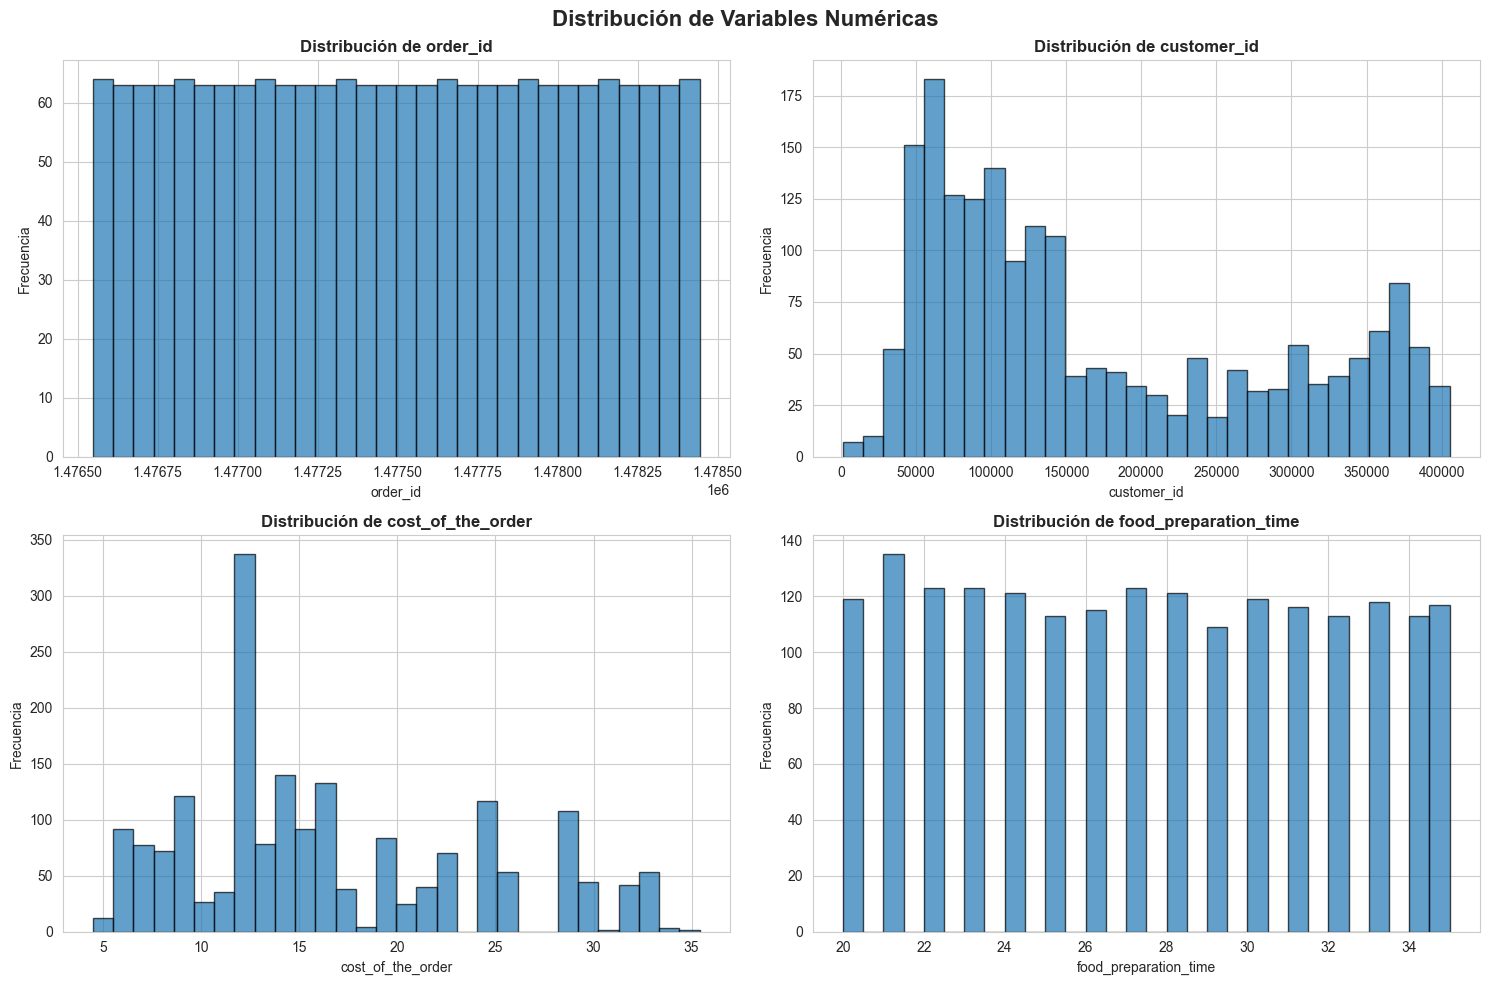

In [ ]:
# Gráficos de distribución de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold')

numeric_cols = df.select_dtypes(include=[np.number]).columns[:4]  # Primeras 4 columnas numéricas
for idx, col in enumerate(numeric_cols):
    ax = axes[idx // 2, idx % 2]
    df[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribución de {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

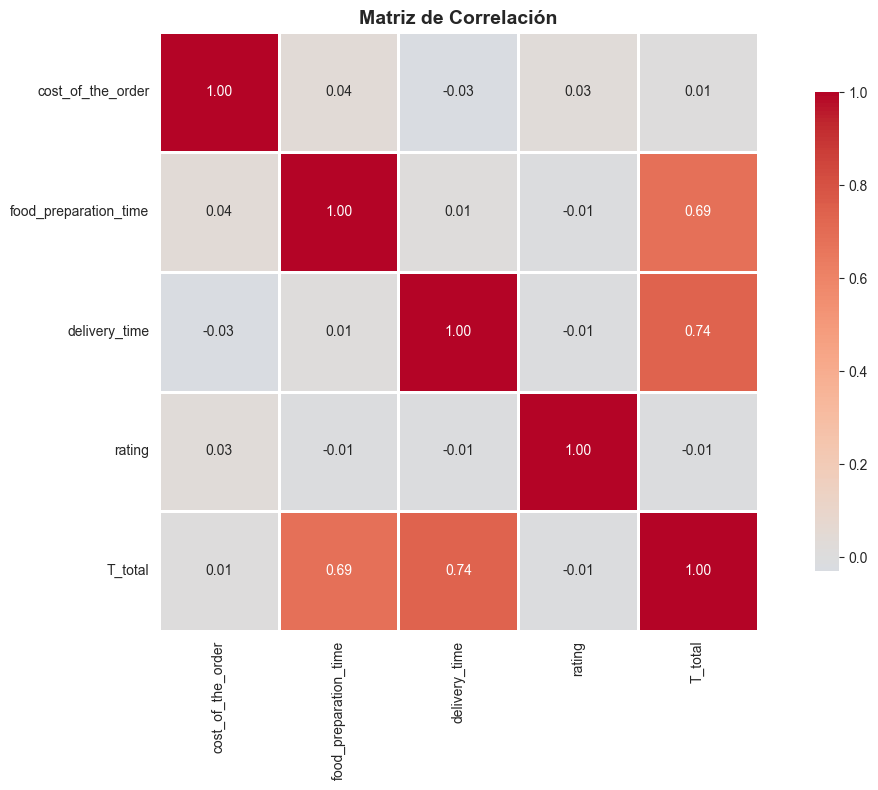

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_numerical.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\jeron\AppData\Local\Temp\ipykernel_34724\26145004.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include='object').columns[:2]  # Primeras 2 columnas categóricas


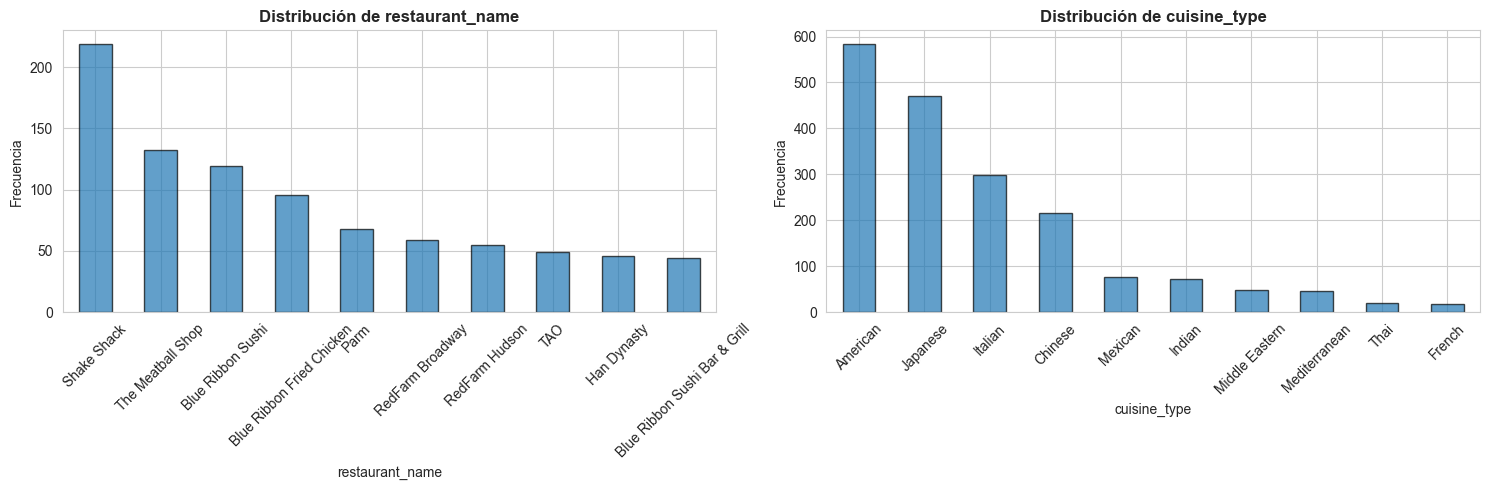

In [ ]:
# Gráficos de barras para variables categóricas
categorical_cols = df.select_dtypes(include='object').columns[:2]  # Primeras 2 columnas categóricas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df[col].value_counts().head(10).plot(kind='bar', ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución de {col}', fontweight='bold')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].set_xlabel(col)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Hallazgos y Explicaciones de Negocio

### 7.1 Resumen Ejecutivo
Describe aquí los hallazgos principales del análisis:
- Patrones identificados
- Anomalías detectadas
- Oportunidades de negocio

### 7.2 Insights Clave
1. **Insight 1**: Descripción del primer insight importante
2. **Insight 2**: Descripción del segundo insight importante
3. **Insight 3**: Descripción del tercer insight importante

### 7.3 Recomendaciones de Negocio
- Recomendación 1
- Recomendación 2
- Recomendación 3

### 7.4 Limitaciones y Próximos Pasos
- Limitaciones del análisis
- Próximos pasos sugeridos
- Datos adicionales requeridos

## 8. Metodología de Ciencia de Datos Aplicada

Este análisis sigue la metodología **CRISP-DM** (Cross-Industry Standard Process for Data Mining):

1. **Comprensión del Negocio**: Identificar objetivos y requisitos
2. **Comprensión de Datos**: Recolectar y explorar datos
3. **Preparación de Datos**: Limpiar y transformar datos
4. **Modelado**: Aplicar técnicas de análisis
5. **Evaluación**: Interpretar resultados
6. **Despliegue**: Implementar soluciones

---

**Fecha de Realización**: Enero 30, 2026  
**Herramientas Utilizadas**: Python, Pandas, NumPy, Matplotlib, Seaborn